In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

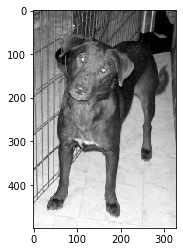

In [2]:
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]

for categ in categories:
    path=os.path.join(dataDir,categ)#combines the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    

In [3]:
img_array.shape

(499, 327)

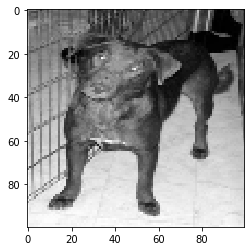

In [15]:
img_size = 100
new_img_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_img_array,cmap="gray")
plt.show()
# for n_img in new_img_array:
#     print(n_img)
    

In [1]:
#================================================code starts from here ====================================================
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
training_data=[]
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]
img_size = 100
def prepare_training_data():
    for categ in categories:
        path=os.path.join(dataDir,categ)#combines the path
        classi_num = categories.index(categ)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_img_array,classi_num])
prepare_training_data()

8000

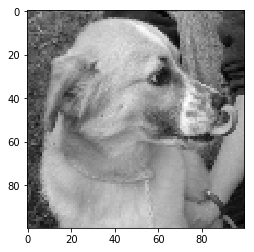

In [2]:
v1=training_data[511][0]
plt.imshow(training_data[511][0],cmap="gray")
len(training_data)

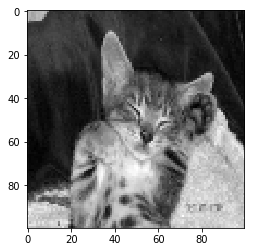

In [3]:
#To make the network learn efficiently we have to shuffle

import random
random.shuffle(training_data)



plt.imshow(training_data[8][0],cmap="gray")


In [4]:
# we have to separate training data and the target
X = []
y = []
for feature,label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,1)

In [5]:
X.shape[1:]

(100, 100, 1)

In [6]:
#saving the training the data set ................ i.e X and y

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
Z=[]
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)
X[0].shape

(100, 100, 1)

In [8]:
#===============================================deeplearning code=====================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("y.pickle","rb"))


In [9]:
# Normalizing

X = X/255.0

model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=(100,100,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [11]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"] )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
#training the dataset

model.fit(X,y,batch_size=4,epochs=20,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/20
7200/7200 [==============================] - 59s 8ms/sample - loss: 0.6925 - acc: 0.5250 - val_loss: 0.6774 - val_acc: 0.5700
Epoch 2/20
7200/7200 [==============================] - 58s 8ms/sample - loss: 0.6669 - acc: 0.5987 - val_loss: 0.6522 - val_acc: 0.5987
Epoch 3/20
7200/7200 [==============================] - 58s 8ms/sample - loss: 0.6258 - acc: 0.6550 - val_loss: 0.5867 - val_acc: 0.6900
Epoch 4/20
7200/7200 [==============================] - 58s 8ms/sample - loss: 0.5728 - acc: 0.7021 - val_loss: 0.5504 - val_acc: 0.7262
Epoch 5/20
7200/7200 [==============================] - 58s 8ms/sample - loss: 0.5160 - acc: 0.7465 - val_loss: 0.5211 - val_acc: 0.7462
Epoch 6/20
7200/7200 [==============================] - 59s 8ms/sample - loss: 0.4676 - acc: 0.7796 - val_loss: 0.4936 - val_acc: 0.7650
Epoch 7/20
7200/7200 [==============================] - 59s 8ms/sample - loss: 0.4133 - acc: 0.8072 - val_loss: 0.4917 - val_acc: 0

In [17]:
model.save("./catsAndDogs.h5")

In [18]:
new_model = tf.keras.models.load_model("catsAndDogs")

In [19]:
#loadinng dataset to testing my model

X_test=[]
categ=["dogs","cats"]
for cate in categ:
    path = os.path.join("F:/Dataset/dogs-cats-images/dataset/training_set/",cate)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        r_image = cv2.resize(image,(img_size,img_size))
        X_test.append(r_image)


8000

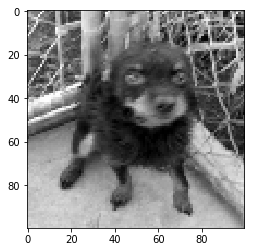

In [20]:
random.shuffle(X_test)
plt.imshow(X_test[1000],cmap="gray")
len(X_test)

In [21]:

X_test_np = np.array(X_test).reshape(-1,img_size,img_size,1)


In [22]:
output = new_model.predict([X_test_np])

DOG


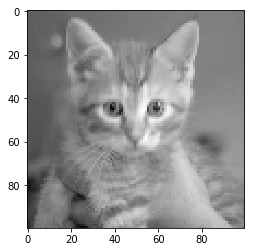

CAT


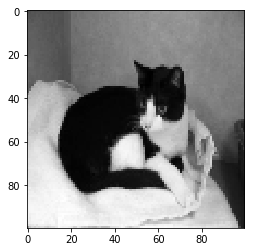

CAT


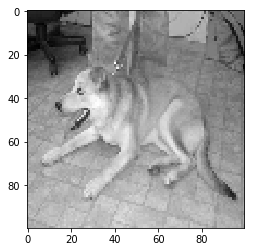

CAT


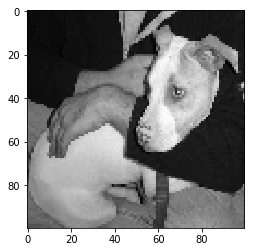

CAT


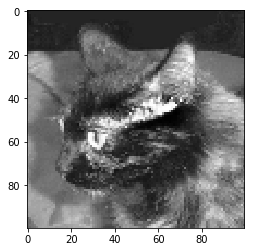

CAT


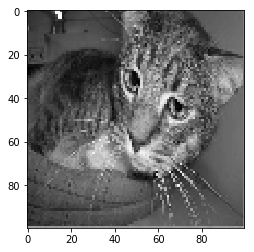

DOG


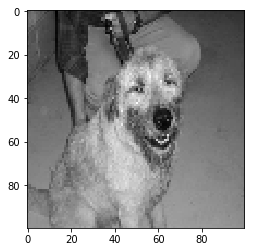

DOG


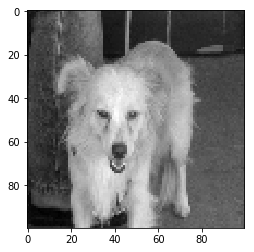

CAT


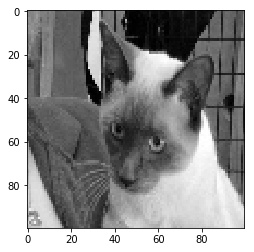

CAT


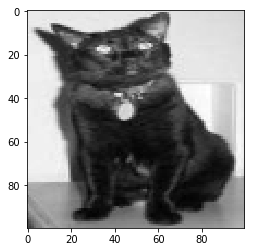

CAT


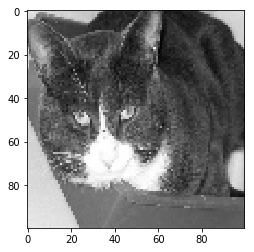

DOG


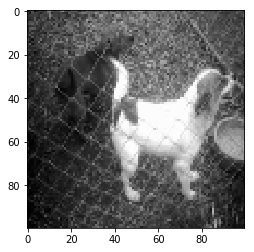

CAT


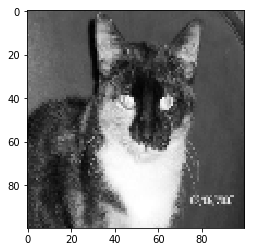

CAT


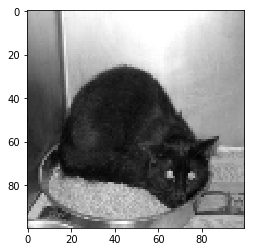

DOG


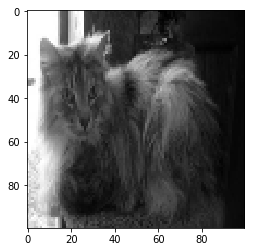

DOG


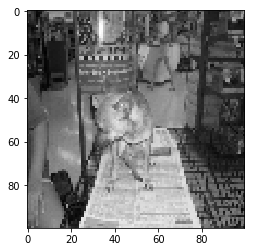

DOG


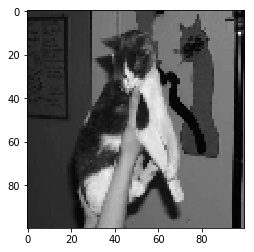

DOG


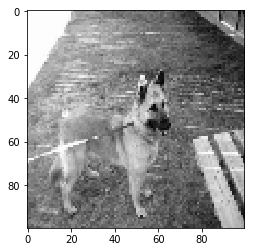

DOG


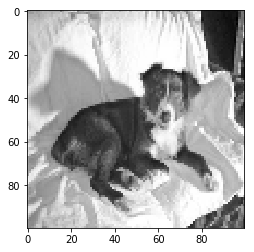

CAT


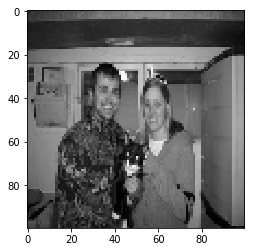

DOG


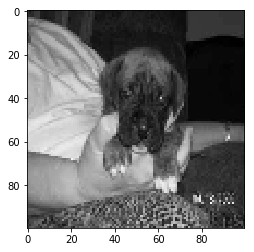

DOG


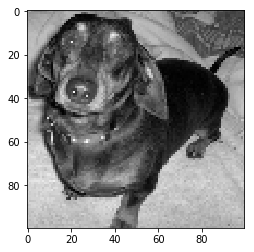

DOG


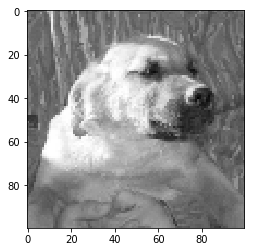

DOG


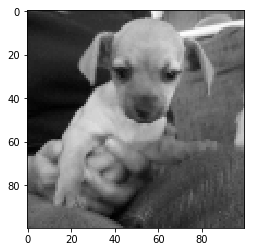

DOG


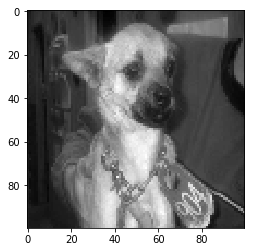

DOG


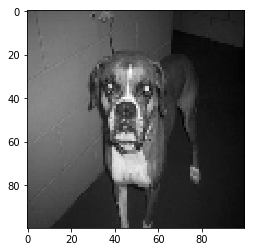

DOG


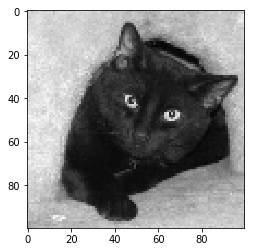

DOG


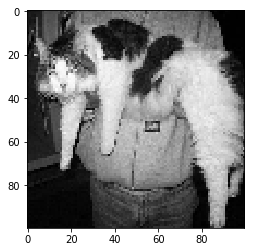

DOG


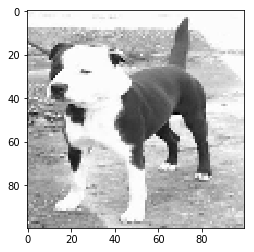

CAT


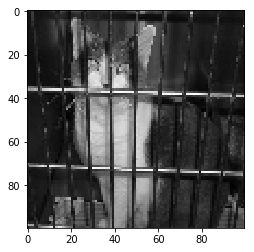

DOG


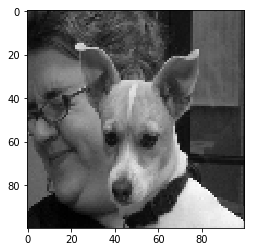

DOG


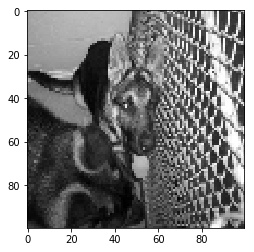

CAT


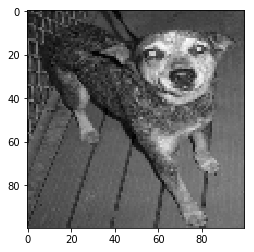

CAT


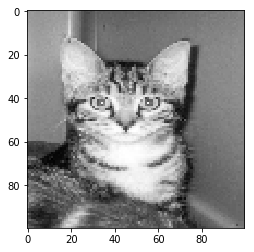

CAT


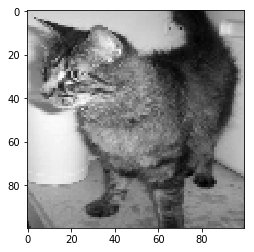

CAT


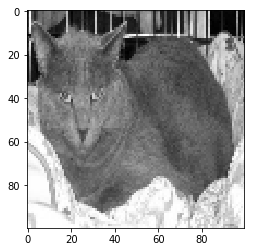

DOG


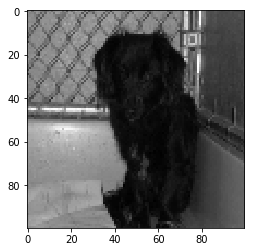

CAT


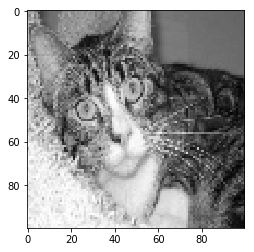

DOG


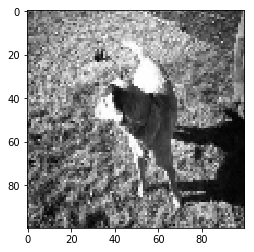

DOG


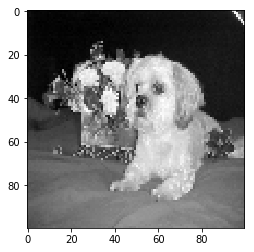

DOG


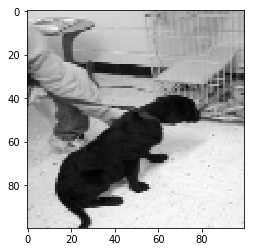

DOG


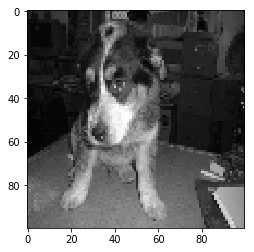

DOG


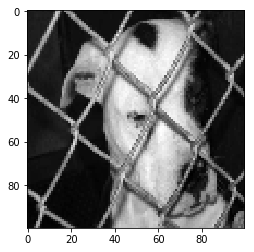

DOG


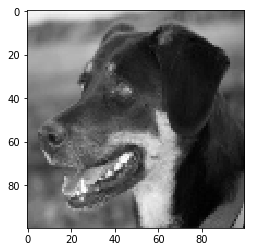

CAT


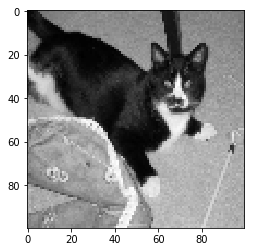

DOG


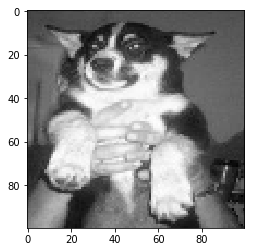

DOG


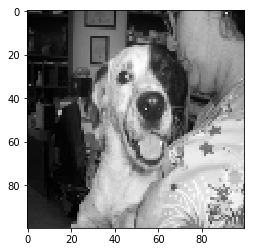

DOG


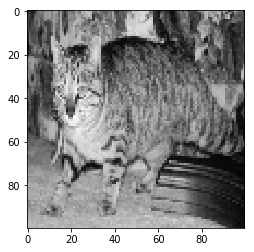

DOG


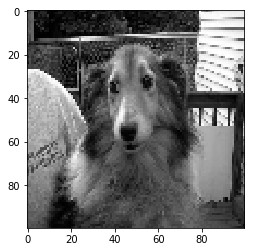

DOG


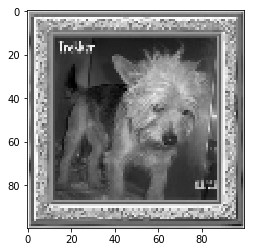

DOG


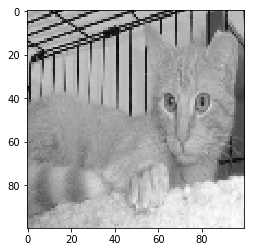

DOG


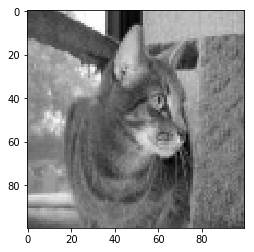

DOG


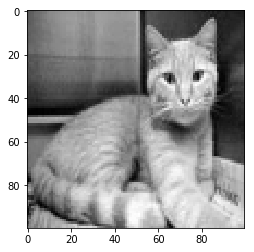

CAT


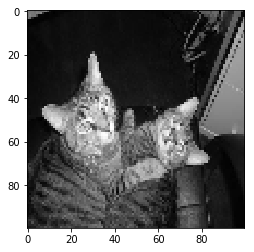

DOG


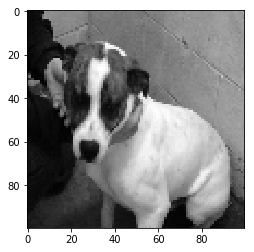

DOG


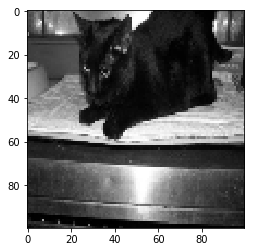

DOG


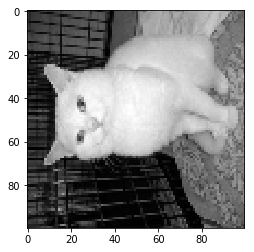

CAT


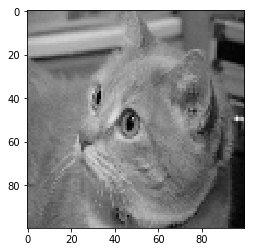

DOG


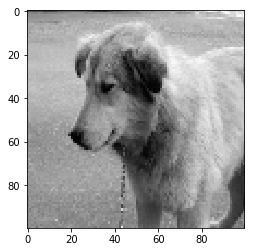

DOG


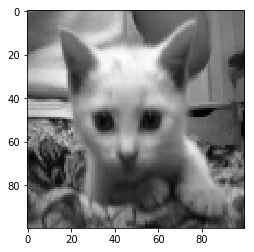

CAT


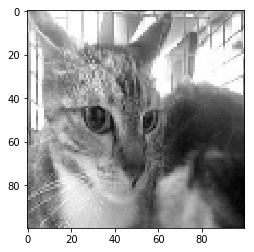

DOG


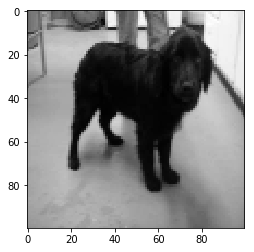

DOG


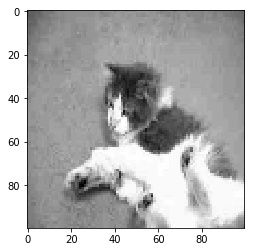

DOG


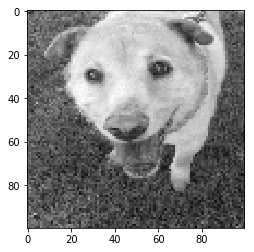

DOG


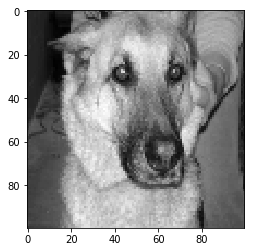

DOG


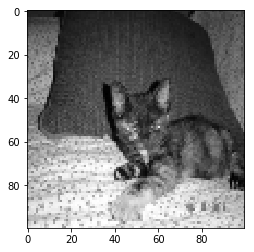

DOG


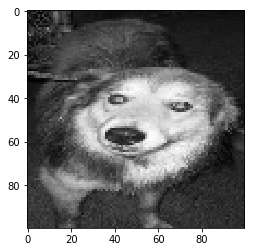

CAT


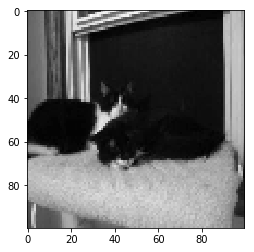

DOG


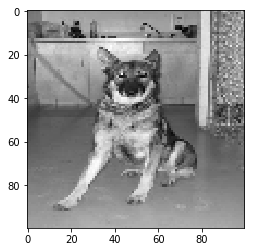

CAT


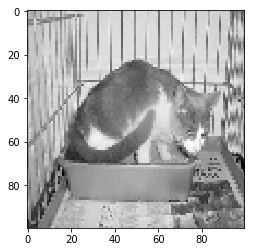

CAT


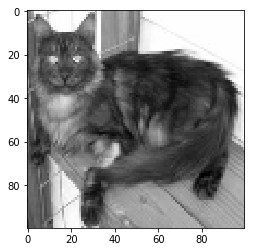

DOG


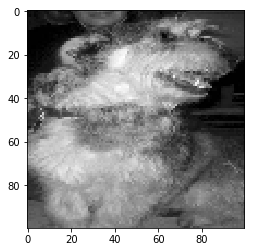

DOG


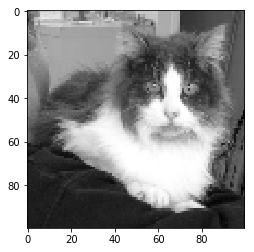

DOG


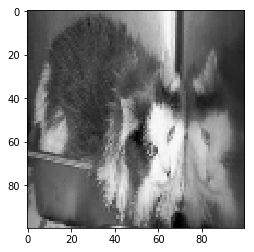

DOG


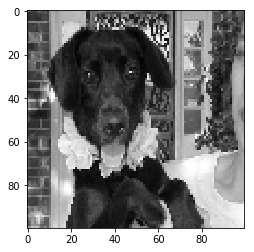

DOG


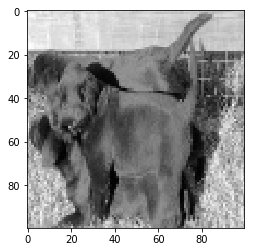

DOG


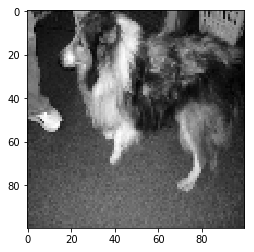

DOG


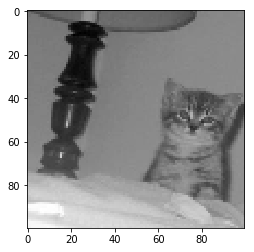

DOG


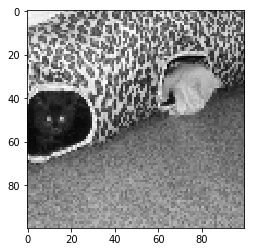

DOG


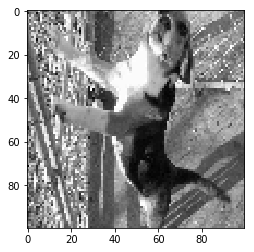

DOG


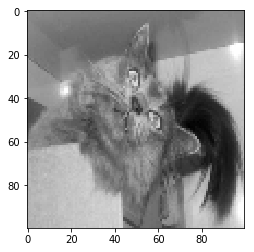

DOG


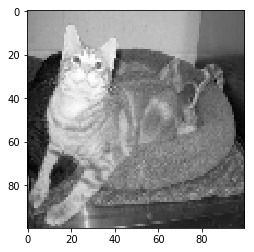

DOG


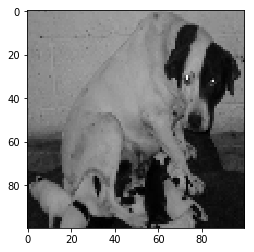

DOG


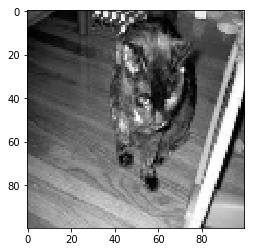

DOG


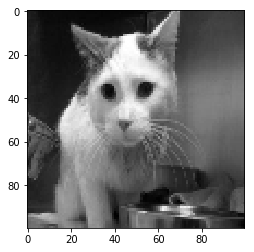

DOG


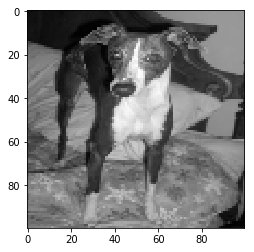

DOG


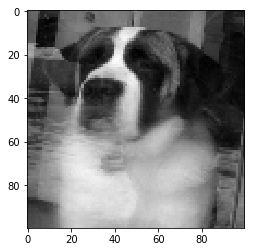

CAT


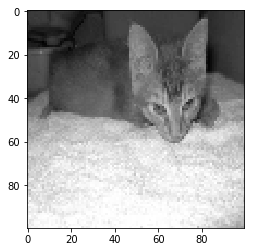

DOG


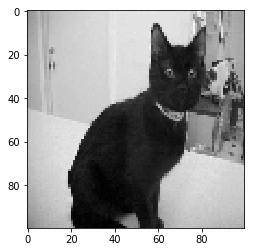

CAT


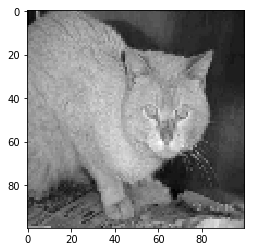

DOG


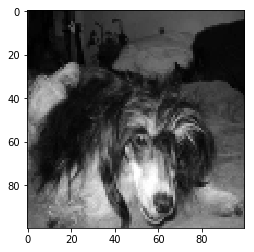

DOG


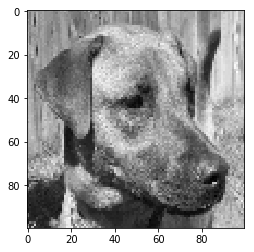

CAT


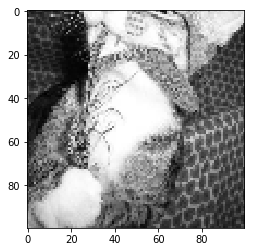

CAT


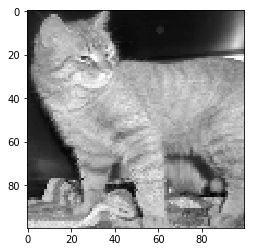

CAT


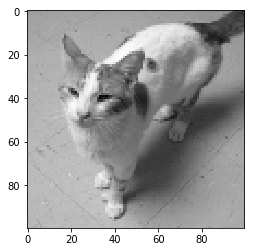

DOG


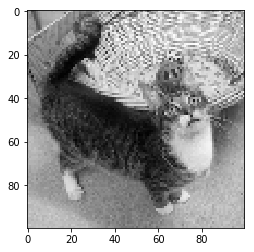

DOG


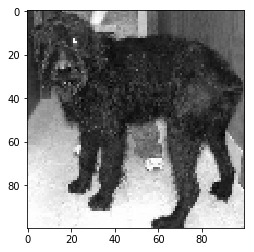

DOG


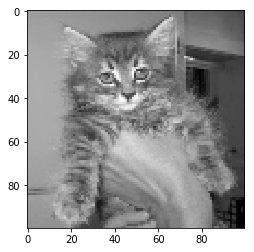

DOG


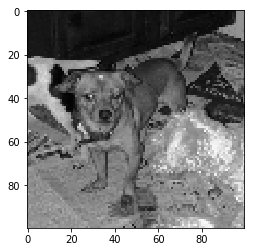

DOG


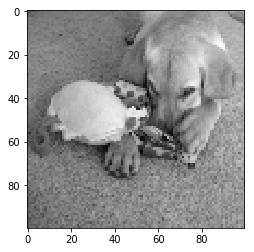

In [23]:
for i in range(100):
    if output[i][0] == 0.0:
        print("DOG") 
    else:
        print("CAT")
    plt.imshow(X_test[i],cmap="gray")
    plt.show()
    print("===========================================================")